#                               Graduate Admission Prediction


#  Submitted By: Group 10

# Balasani Dheeraj Redddy AM.EN.U4CSE20115
# Vanguru Vekata Varun Kumar Reddy AM.EN.U4CSE20172
# Chinthakuntla Purushottam Reddy AM.EN.U4CSE20120
# S N V V S Gowtham Tadavarthy AM.EN.U4CSE20160
# Joshua Wilson Philip AM.EN.U4CSE20135
# Maddipati Umesh Chandra AM.EN.U4CSE20142


# Import modules

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Summarization

In [127]:
data = pd.read_csv("Admission_Predict.csv")
data.shape

(400, 9)

In [128]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,NaN,NaN,4,4.5,4.5,9.65,1,0.92
1,2,312.0,107.0,4,4.0,4.5,8.87,1,0.76


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          399 non-null    float64
 2   TOEFL Score        399 non-null    float64
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


In [130]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,399.000000,399.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.619048,107.383459,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.391182,6.053848,1.143728,1.006869,0.898478,0.597325,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.167500,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.072500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [131]:
data.isnull().sum()

Serial No.           0
GRE Score            1
TOEFL Score          1
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [132]:
data.drop('Serial No.', axis=1, inplace=True)

In [133]:
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

# Data Pre-processing


In [134]:
X = data.iloc[:,:-1].values 
Y = data.iloc[:,7:].values  

In [135]:
print(X[:,:])

[[   nan    nan   4.   ...   4.5    9.65   1.  ]
 [312.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   116.     4.   ...   4.5    9.45   1.  ]
 [312.   103.     3.   ...   4.     8.78   0.  ]
 [321.   117.     4.   ...   4.     9.66   1.  ]]


# Filling misssing values with mode

In [136]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X[:, :3])
X[:, :3]= imputer.transform(X[:,:3]) 
print(X[0, :3])

[312. 110.   4.]


# Data Visualization:

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR'}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>, <AxesSubplot:>]],
      dtype=object)

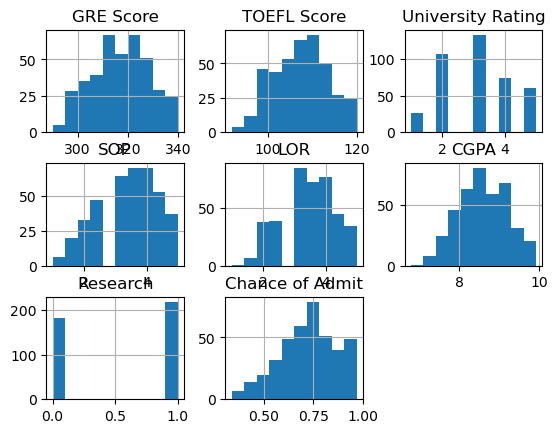

In [137]:
import matplotlib.pyplot as plt
data.hist()


In [138]:
GRE = pd.DataFrame(data['GRE Score'])
GRE.describe()

,GRE Score
count,399.000000
mean,316.619048
std,11.391182
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


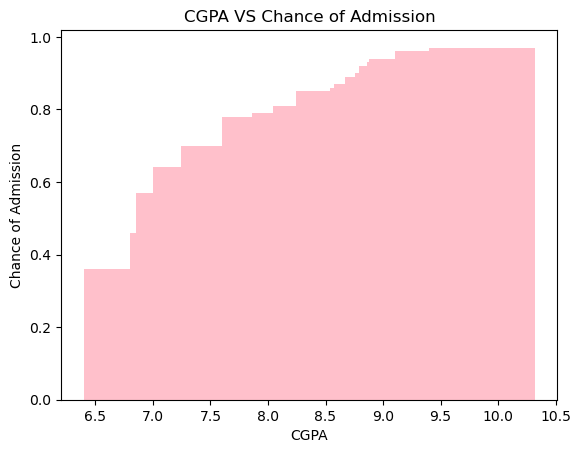

In [139]:
plt.bar(X[:,5], Y[:,0],color = "pink")
plt.title("CGPA VS Chance of Admission")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admission")
plt.show()

In [140]:
print(X)

[[312.   110.     4.   ...   4.5    9.65   1.  ]
 [312.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   116.     4.   ...   4.5    9.45   1.  ]
 [312.   103.     3.   ...   4.     8.78   0.  ]
 [321.   117.     4.   ...   4.     9.66   1.  ]]


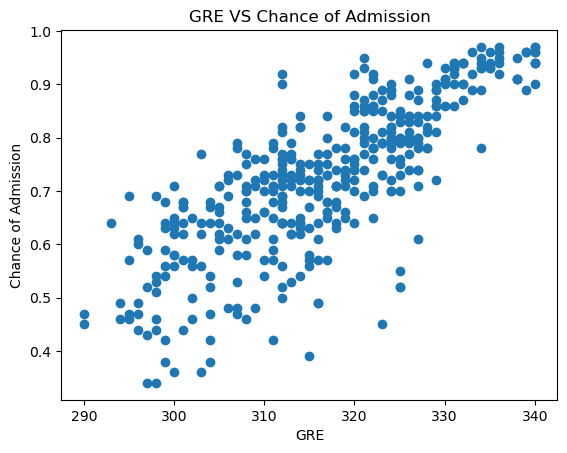

In [141]:
plt.scatter(X[:,0], Y)
plt.title("GRE VS Chance of Admission")
plt.xlabel("GRE")
plt.ylabel("Chance of Admission")
plt.show()

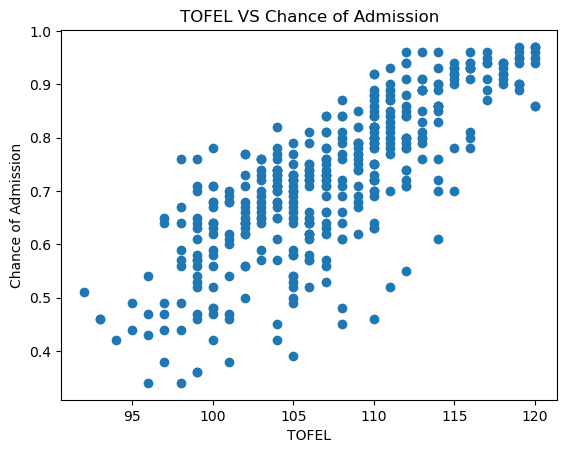

In [142]:
plt.scatter(X[:,1], Y)
plt.title("TOFEL VS Chance of Admission")
plt.xlabel("TOFEL")
plt.ylabel("Chance of Admission")
plt.show()

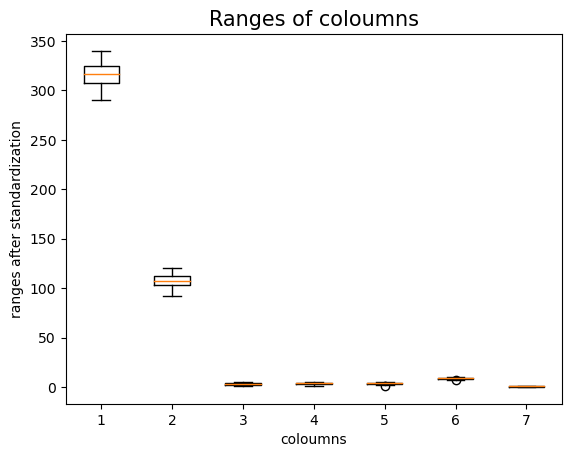

In [143]:
plt.boxplot(X[:,:])
plt.title('Ranges of coloumns',fontsize=15)
plt.xlabel("coloumns")
plt.ylabel("ranges after standardization")
plt.show()

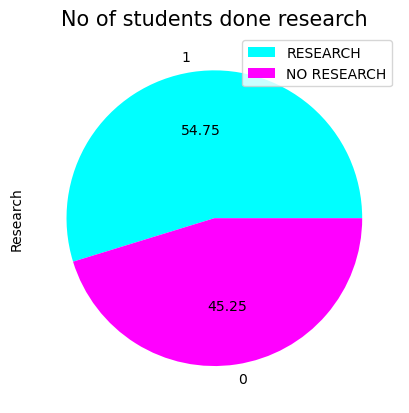

In [144]:
data['Research'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('No of students done research',fontsize=15)
plt.legend(['RESEARCH','NO RESEARCH'])
plt.show()

C:\Users\dheer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


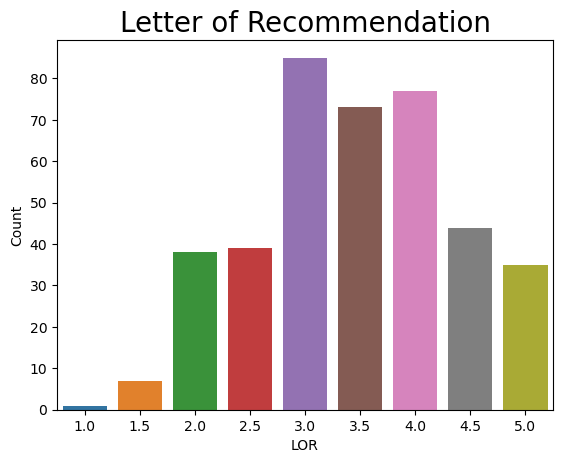

In [145]:
LOR = pd.DataFrame(data.groupby(['LOR']).count()['GRE Score'])
LOR.rename({'GRE Score':'Count'}, axis=1, inplace=True)
sns.barplot(LOR.index, LOR['Count']).set_title('Letter of Recommendation', size='20')
plt.show()

# creating new cleaned file

In [146]:
arr = np.append(X, Y, axis=1)
col = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Chance of Admit ']
newdf = pd.DataFrame(arr, columns=col)
print(newdf.isnull().sum())
newdf.to_csv('cleaned.csv')

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


# standardization

In [147]:
from sklearn.preprocessing import StandardScaler  
st_x= StandardScaler()  
X[:,:3]= st_x.fit_transform(X[:,:3])  

# MinMax Scaler

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X[:,0:3]= scaler.fit_transform(X[:,0:3])
print(X[:,0:3])

[[0.44       0.64285714 0.75      ]
 [0.44       0.53571429 0.75      ]
 [0.52       0.42857143 0.5       ]
 ...
 [0.8        0.85714286 0.75      ]
 [0.44       0.39285714 0.5       ]
 [0.62       0.89285714 0.75      ]]


# LogisticRegression

In [149]:
Y_1=[1 if each > 0.82 else 0 for each in Y]
Y = np.array(Y_1)

In [150]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=0) 


In [151]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [152]:
y_logistic_pred= classifier.predict(x_test)

In [153]:
print('Train Score: ', classifier.score(x_train, y_train))  
print('Test Score: ', classifier.score(x_test, y_test))  

Train Score:  0.940625
Test Score:  0.9375


In [154]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_logistic_pred))

[[60  1]
 [ 4 15]]


In [155]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_logistic_pred))
print("recall_score: ", recall_score(y_test, y_logistic_pred))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_logistic_pred))

precision_score:  0.9375
recall_score:  0.7894736842105263
f1_score:  0.8571428571428572


C:\Users\dheer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


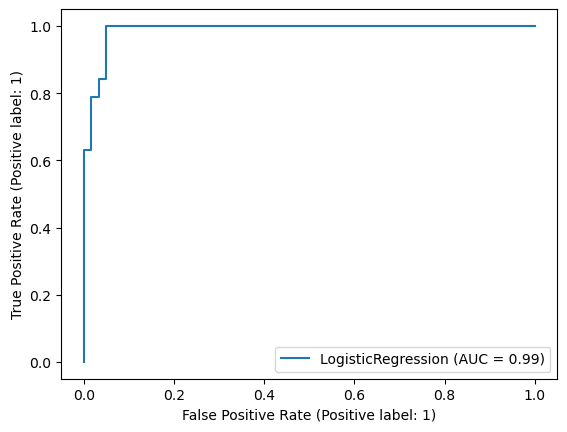

In [156]:
from sklearn import metrics
metrics.plot_roc_curve(classifier, x_test, y_test)
plt.show()

# SVC

In [157]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
print("score: ", svm.score(x_test,y_test))

score:  0.9375


In [158]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_svm))
print("recall_score: ", recall_score(y_test, y_pred_svm))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_svm))

precision_score:  0.9375
recall_score:  0.7894736842105263
f1_score:  0.8571428571428572


In [159]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_svm))

[[60  1]
 [ 4 15]]


C:\Users\dheer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


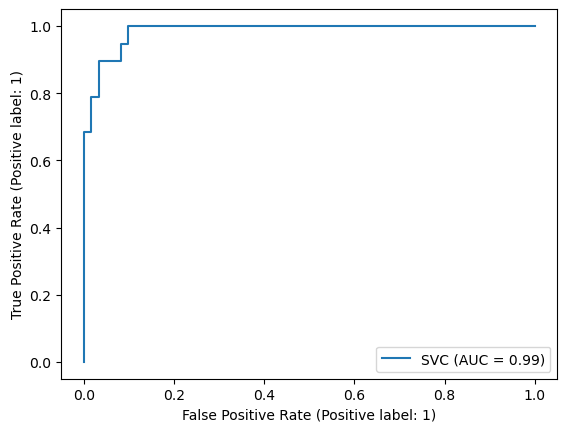

In [160]:
from sklearn import metrics
metrics.plot_roc_curve(svm, x_test, y_test)
plt.show()

# RandomForestClassifier

In [161]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
y_pred_RFC = RFC.predict(x_test)
print("score: ", RFC.score(x_test,y_test))

score:  0.95


In [162]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_RFC))
print("recall_score: ", recall_score(y_test,y_pred_RFC))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_RFC))

precision_score:  0.9411764705882353
recall_score:  0.8421052631578947
f1_score:  0.8888888888888888


In [163]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_RFC))

[[60  1]
 [ 3 16]]


C:\Users\dheer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


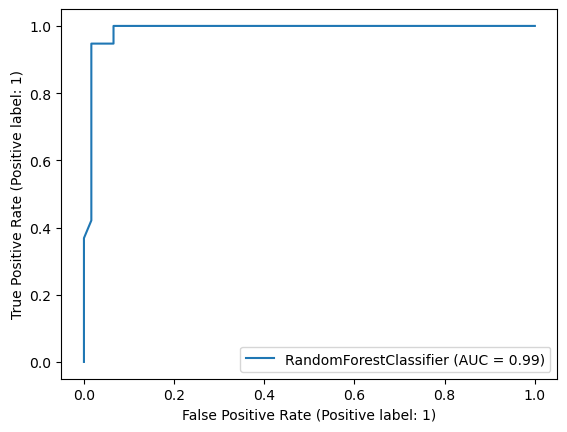

In [164]:
from sklearn import metrics
metrics.plot_roc_curve(RFC, x_test, y_test)
plt.show()

# Naive Bayes Classifiers

In [165]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy:",metrics.accuracy_score(y_test, y_pred_gnb))

Gaussian Naive Bayes model accuracy: 0.9375


In [166]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_gnb))
print("recall_score: ", recall_score(y_test,y_pred_gnb))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_gnb))

precision_score:  0.9375
recall_score:  0.7894736842105263
f1_score:  0.8571428571428572


In [167]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,  y_pred_gnb))

[[60  1]
 [ 4 15]]


C:\Users\dheer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


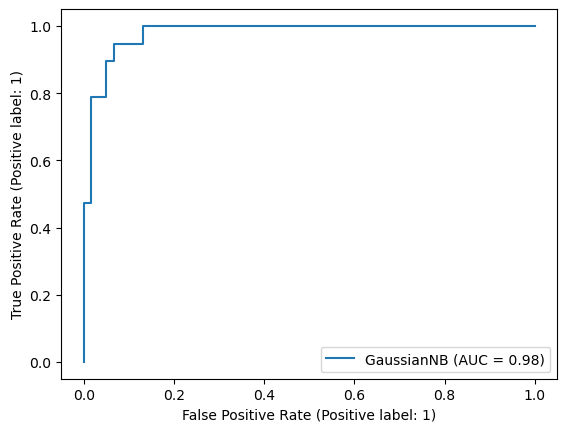

In [168]:
from sklearn import metrics
metrics.plot_roc_curve(gnb, x_test, y_test)
plt.show()

# KNeighborsClassifier

In [169]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("KNN model accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

KNN model accuracy: 0.925


In [170]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_knn))
print("recall_score: ", recall_score(y_test,y_pred_knn))
from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_knn))

precision_score:  0.9333333333333333
recall_score:  0.7368421052631579
f1_score:  0.8235294117647058


In [171]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,  y_pred_knn))

[[60  1]
 [ 5 14]]


C:\Users\dheer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


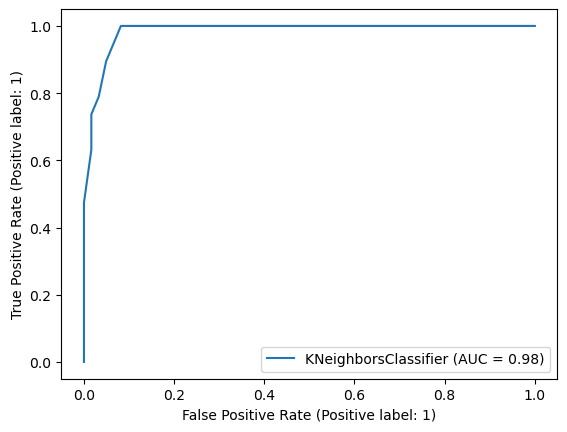

In [172]:
from sklearn import metrics
metrics.plot_roc_curve(knn, x_test, y_test)
plt.show()

# accuracy for different values of K

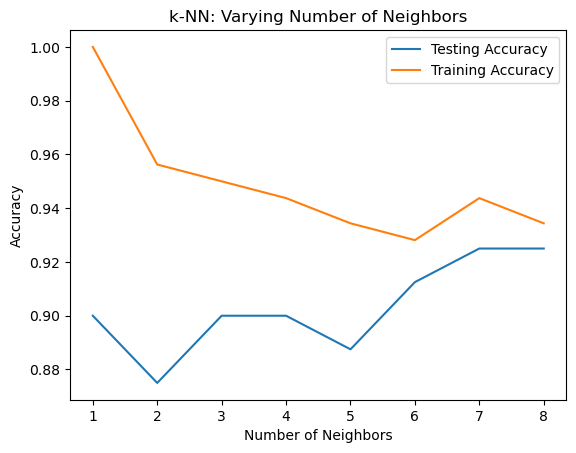

In [173]:
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(x_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# CROSS VALIDATION SCORES

In [174]:
from sklearn.model_selection import cross_val_score

In [175]:
cross_val_score(LogisticRegression(),x_train,y_train)#average=0.93125

array([0.921875, 0.890625, 0.984375, 0.921875, 0.9375  ])

In [176]:
cross_val_score(SVC(),x_train,y_train)#average=0.928125

array([0.921875, 0.890625, 0.984375, 0.921875, 0.921875])

In [177]:
cross_val_score(RandomForestClassifier(),x_train,y_train)#average=0.946875

array([0.921875, 0.90625 , 1.      , 0.9375  , 0.96875 ])

In [178]:
cross_val_score(GaussianNB(),x_train,y_train)#average=

array([0.921875, 0.890625, 0.9375  , 0.875   , 0.9375  ])

In [179]:
cross_val_score(KNeighborsClassifier(),x_train,y_train)#average=

array([0.9375  , 0.921875, 0.96875 , 0.921875, 0.90625 ])

# accuracy comparison of various algorithms

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


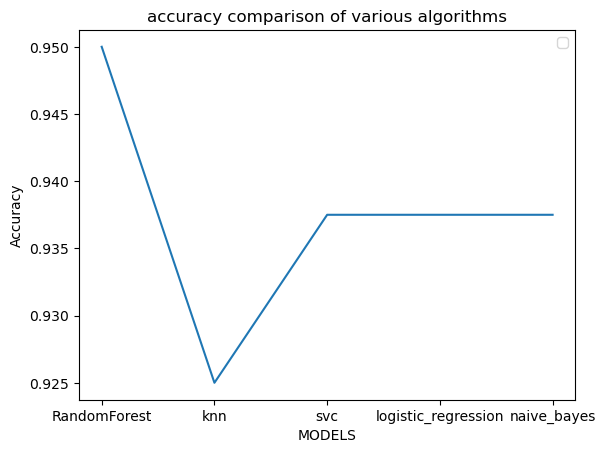

In [182]:
models=['RandomForest','knn','svc','logistic_regression','naive_bayes']
accuracy=[metrics.accuracy_score(y_test, y_pred_RFC),metrics.accuracy_score(y_test, y_pred_knn),metrics.accuracy_score(y_test, y_pred_svm), metrics.accuracy_score(y_test,y_logistic_pred),metrics.accuracy_score(y_test,y_pred_gnb)]
  
plt.title('accuracy comparison of various algorithms')
plt.plot(models, accuracy,)
plt.legend()
plt.xlabel('MODELS')
plt.ylabel('Accuracy')
plt.show()

# saving RFC classifier

In [181]:
import pickle
with open("./college_predict.pkl", "wb") as f:
    pickle.dump(RFC, f)